In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
claims = pd.read_csv('C:/Users/ZomAdmin/Desktop/New folder/New folder/Data Science with python/Python Session 5/Main case submission/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demographics = pd.read_csv('C:/Users/ZomAdmin/Desktop/New folder/New folder/Data Science with python/Python Session 5/Main case submission/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [3]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
cust_demographics

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [5]:
final_data = pd.merge(left=cust_demographics,right=claims,how='left',left_on='CUST_ID',right_on='customer_id')

In [6]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [7]:
round(final_data.describe().T,2,)

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1092.0,50831621.40,28462146.91,154557.0,26673324.5,49790067.0,76019781.25,99961993.0
claim_id,1085.0,48915528.40,29128181.62,26832.0,24046062.0,48559754.0,74043997.00,99775483.0
customer_id,1085.0,50767904.34,28496245.37,154557.0,26450621.0,49759488.0,76093960.00,99961993.0
total_policy_claims,1075.0,1.59,1.15,1.0,1.0,1.0,2.00,8.0


In [8]:
final_data.select_dtypes('object').describe().T

,count,unique,top,freq
gender,1092,2,Male,558
DateOfBirth,1092,1085,01-May-86,2
State,1092,50,NY,31
Contact,1092,1085,743-569-4783,2
Segment,1092,3,Gold,376
incident_cause,1085,5,Other causes,285
claim_date,1085,100,04/04/2018,18
claim_area,1085,2,Auto,970
police_report,1085,3,No,621
claim_type,1085,3,Material only,653


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [9]:
final_data.dtypes ### As for the datatypes several columns has wrong datatypes as of now will keep changing them going forward
##e.g (DateOfBirth,claim_amount,Contact,claim_date,) -- Datatypes should be changed for these columns 

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [10]:
final_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [11]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No


In [12]:
final_data['claim_amount'] = pd.to_numeric(final_data['claim_amount'].str.replace('$',''))

In [13]:
final_data.dtypes ##Here we have changed the datatype of claim_amount made it float

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
dtype: object

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [14]:
final_data.to_csv('final_data.csv',header=True)

In [15]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No


In [16]:
claim_data = final_data[['claim_type','police_report']]

In [17]:
claim_data.head(1)

,claim_type,police_report
0,Material only,No


In [18]:
final_data['check_flag']=pd.Series(np.where(claim_data.police_report=='Yes',0,1))

**check_flag== 0 stands for reported and check_flag== 1 stands for unreported took both the columns (no,unknown) while creating 
unreported claim check flags**

In [19]:
final_data[(final_data.claim_type=='Injury only')  & (final_data.check_flag==1)]  ###Almost 125 claims have gone unreported:

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag
8,21831191,Male,17-May-77,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,1
21,63916778,Male,07-Sep-66,IL,146-157-4572,Platinum,7809917.0,63916778.0,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No,1
22,17004138,Female,13-Aug-65,WA,436-354-4682,Silver,29205389.0,17004138.0,Natural causes,06/25/2017,Auto,No,Injury only,31380.0,1.0,No,1
33,80379865,Male,27-Feb-69,NM,427-513-8479,Gold,18210740.0,80379865.0,Natural causes,02/09/2018,Auto,No,Injury only,18580.0,NaN,No,1
41,27205554,Male,12-Apr-76,RI,521-912-8139,Silver,13167216.0,27205554.0,Driver error,05/14/2018,Auto,No,Injury only,16910.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,77134414,Male,10-Jul-83,AL,693-239-2865,Silver,30903408.0,77134414.0,Other driver error,01/07/2017,Auto,Unknown,Injury only,28760.0,1.0,No,1
1039,91002298,Male,09-Apr-98,MA,349-124-3976,Gold,99300549.0,91002298.0,Natural causes,04/05/2017,Auto,No,Injury only,34010.0,1.0,No,1
1048,41946743,Female,26-Sep-70,WA,756-245-4789,Gold,11179944.0,41946743.0,Other driver error,05/21/2018,Auto,No,Injury only,17870.0,6.0,No,1
1069,90217818,Female,18-May-80,TN,891-651-8671,Gold,85546357.0,90217818.0,Other driver error,06/04/2017,Auto,No,Injury only,37743.0,1.0,Yes,1


# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
# Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [20]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1


In [21]:
final_data[final_data.duplicated('CUST_ID')]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
5,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,1
7,19269962,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,1
9,21831191,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,1
625,84147585,Male,18-Oct-72,AK,743-569-4783,Gold,78221963.0,84147585.0,Driver error,04/10/2018,Auto,Yes,Injury only,14430.0,4.0,No,0
627,85357756,Male,02-Jan-70,PA,915-698-3649,Platinum,1654201.0,85357756.0,Driver error,06/23/2018,Auto,Unknown,Material only,2510.0,1.0,No,1
629,53539195,Male,02-Oct-89,NV,914-342-8239,Gold,41779510.0,53539195.0,Driver error,10/03/2018,Home,No,Injury only,25040.0,1.0,No,1


In [22]:
final_data.drop_duplicates('CUST_ID',inplace = True) ###Here we have deleted duplicate cust_id

In [23]:
final_data.shape ##now 1085 rows remain

(1085, 17)

# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [24]:
final_data.isna().sum() ##Count of missing value of each column:

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
check_flag              0
dtype: int64

In [25]:
final_data.claim_id.mode().iloc[0]

26832.0

In [26]:
final_data.claim_id.fillna(final_data.claim_id.mode().iloc[0],inplace = True) ###Here we have impute mode of claim_id as this is
##Categorical variable

In [27]:
final_data.customer_id.mode().iloc[0]

154557.0

In [28]:
final_data.customer_id.fillna(final_data.customer_id.mode().iloc[0],inplace=True)###Here we have imputed mode for customer_id

In [29]:
final_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
check_flag              0
dtype: int64

In [30]:
final_data.incident_cause.fillna(final_data.incident_cause.mode().iloc[0],inplace=True)

In [31]:
final_data.claim_date.fillna(final_data.claim_date.mode().iloc[0],inplace=True)

In [32]:
final_data.claim_area.mode().iloc[0]

'Auto'

In [33]:
final_data.claim_area.fillna(final_data.claim_area.mode().iloc[0],inplace=True)

In [34]:
final_data.police_report.fillna(final_data.police_report.mode().iloc[0],inplace=True)

In [35]:
final_data.claim_type.fillna(final_data.claim_type.mode().iloc[0],inplace=True)

In [36]:
final_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           72
total_policy_claims    17
fraudulent              7
check_flag              0
dtype: int64

In [37]:
final_data.claim_amount.mean()

12470.498519249753

In [38]:
final_data.claim_amount.fillna(final_data.claim_amount.mean(),inplace = True)

In [39]:
final_data.total_policy_claims.fillna(final_data.total_policy_claims.mean(),inplace = True)

In [40]:
final_data.fraudulent.fillna(final_data.fraudulent.mode().iloc[0],inplace=True)

In [41]:
final_data.isna().sum() ### No missing value left:

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
check_flag             0
dtype: int64

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
# Children	< 18 Youth	18-30 Adult	30-60 Senior	> 60


In [42]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1


In [43]:
now = pd.Timestamp('now')
final_data['DateOfBirth'] = pd.to_datetime(final_data['DateOfBirth'], format='%d-%b-%y')    # 1
final_data['DateOfBirth'] = final_data['DateOfBirth'].where(final_data['DateOfBirth'] < now, final_data['DateOfBirth'] -  np.timedelta64(100, 'Y'))   # 2
final_data['AGE'] = (now - final_data['DateOfBirth']).astype('<m8[Y]')

In [44]:
from numpy import where as IF

In [45]:
final_data["Age_group"] = IF(final_data.AGE < 18, "Children",
                        IF(final_data.AGE < 30, "Youth",
                         IF(final_data.AGE < 60, "Adult",
                          IF(final_data.AGE < 100, "Senior", "NaN"))))
final_data["Age_group"] = final_data["Age_group"].fillna(final_data["Age_group"].mode())
final_data.groupby(by = "Age_group").count()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE
Age_group,,,,,,,,,,,,,,,,,,
Adult,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801
Senior,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Youth,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271


In [46]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE,Age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,41.0,Adult


# 8. What is the average amount claimed by the customers from various segments?

In [47]:
final_data.groupby('Segment').claim_amount.mean() ### Average amount claimed by customers from various segments:

Segment
Gold        12755.710930
Platinum    12370.138663
Silver      12271.163192
Name: claim_amount, dtype: float64

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [48]:
final_data['claim_date']=pd.to_datetime(final_data.claim_date)

In [49]:
round(final_data[final_data.claim_date <='10-09-2018'].groupby('incident_cause').claim_amount.sum(),1)

incident_cause
Crime                  738562.5
Driver error          3404407.0
Natural causes        1366130.5
Other causes          4164901.0
Other driver error    3468841.5
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [50]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE,Age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,41.0,Adult


In [51]:
final_data[(final_data.incident_cause.isin(['Driver error','Other driver error'])) & (final_data.Age_group=='Adult') &
           (final_data.State.isin(['TX','DE','AK']))].groupby('State').Age_group.count()

State
AK     8
DE    12
TX     9
Name: Age_group, dtype: int64

In [52]:
##IF we want to see how many actually reported to police:
final_data[(final_data.incident_cause.isin(['Driver error','Other driver error'])) & (final_data.Age_group=='Adult') &
           (final_data.State.isin(['TX','DE','AK']))
          & (final_data.police_report=='Yes')]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE,Age_group
524,19796899,Female,1975-12-17 00:00:00,TX,725-873-8239,Gold,9124181.0,19796899.0,Other driver error,2018-04-04,Auto,Yes,Material and injury,24667.5,1.0,Yes,0,44.0,Adult
574,15820948,Male,1964-02-22 18:00:00,TX,583-641-3184,Silver,53831641.0,15820948.0,Driver error,2017-09-27,Auto,Yes,Material and injury,14570.0,1.0,No,0,56.0,Adult
657,9205013,Male,1963-12-11 18:00:00,DE,239-368-6759,Platinum,40283824.0,9205013.0,Driver error,2018-06-17,Auto,Yes,Material and injury,23430.0,1.0,No,0,56.0,Adult


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [53]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE,Age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,41.0,Adult


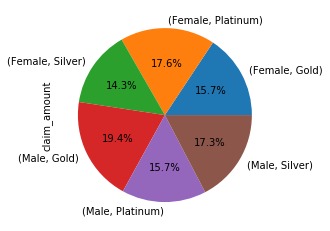

In [54]:
final_data.groupby(['gender','Segment']).claim_amount.sum().plot(kind='pie',autopct='%.1f%%')

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [55]:
final_data.loc[:,['gender','incident_cause']]

,gender,incident_cause
0,Female,Driver error
1,Female,Crime
2,Female,Other driver error
4,Female,Natural causes
6,Male,Crime
...,...,...
1087,Female,Other driver error
1088,Female,Other causes
1089,Male,Other driver error
1090,Female,Other driver error


In [56]:
gender_metric = final_data.loc[final_data.gender.isin(['Female','Male']) & final_data.incident_cause.isin(['Driver error','Other driver error']),['gender','incident_cause']]

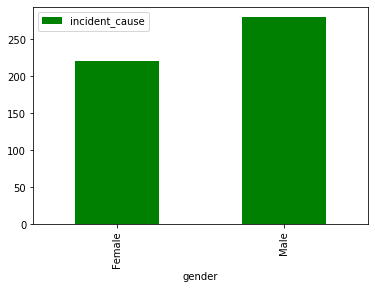

In [57]:
gender_metric.pivot_table(index=gender_metric.gender,aggfunc='count').plot(kind='bar',color='g')
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [58]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE,Age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,41.0,Adult


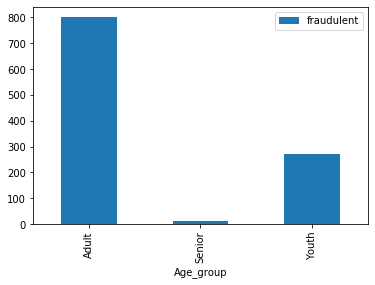

In [59]:
final_data[['Age_group','fraudulent']].pivot_table(index='Age_group',aggfunc='count').plot(kind='bar')

In [60]:
final_data.to_csv('final1_data.csv',header= True)

In [61]:
final_data[['Age_group','fraudulent']].pivot_table(index='Age_group',aggfunc='count')

,fraudulent
Age_group,
Adult,801
Senior,13
Youth,271


**2nd answer of the same ques here we have filtered (fraudulent=='Yes) for the agegroup who actually reported fraud claims**

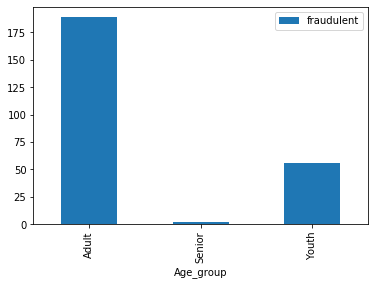

In [62]:
final_data.loc[(final_data.fraudulent =='Yes'),['Age_group','fraudulent']].pivot_table(
    index='Age_group',aggfunc='count').plot(kind='bar')

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [63]:
final_data['monthly_trend']=final_data.claim_date.dt.month

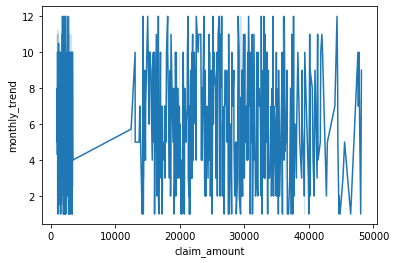

In [64]:
sns.lineplot(x=final_data.claim_amount,y=final_data.monthly_trend)

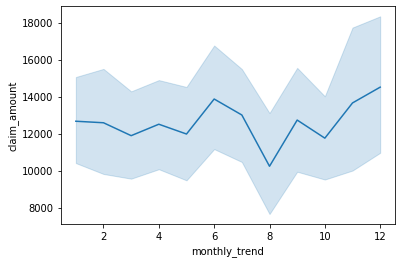

In [65]:
sns.lineplot(x=final_data.monthly_trend,y=final_data.claim_amount)

In [66]:
final_data[['monthly_trend','claim_amount']].max()

monthly_trend       12.0
claim_amount     48150.5
dtype: float64

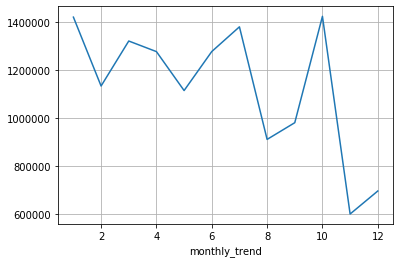

In [67]:
final_data.groupby('monthly_trend').claim_amount.sum().plot(grid=True)

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.


In [68]:
final_data.groupby(['gender','Age_group']).claim_amount.agg('mean')

gender  Age_group
Female  Adult        12034.295839
        Senior        8478.199112
        Youth        12446.985075
Male    Adult        13220.567136
        Senior        9836.250000
        Youth        11797.139597
Name: claim_amount, dtype: float64

**Customer who has done the fraud**

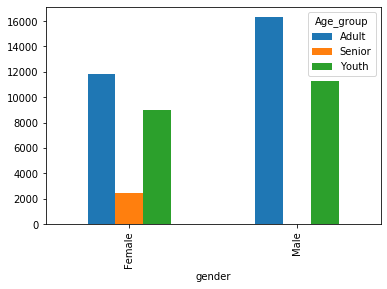

In [69]:
final_data.loc[(final_data.fraudulent=='Yes'),['gender','Age_group','claim_amount']].pivot_table(
    index='gender',columns='Age_group',values='claim_amount',aggfunc='mean').plot(kind='bar')

**Customer with no fraud**

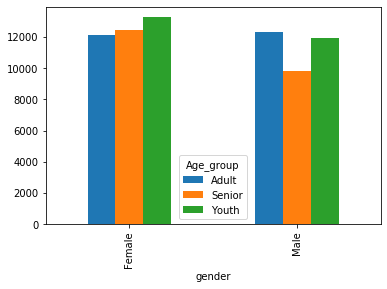

In [70]:
final_data.loc[(final_data.fraudulent=='No'),['gender','Age_group','claim_amount']].pivot_table(
    index='gender',columns='Age_group',values='claim_amount',aggfunc='mean').plot(kind='bar')

# 16. Is there any similarity in the amount claimed by males and females? 

In [71]:
final_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'check_flag', 'AGE', 'Age_group', 'monthly_trend'],
      dtype='object')

In [72]:
males = final_data[final_data.gender =='Male']['claim_amount']

In [73]:
females = final_data[final_data.gender =='Female']['claim_amount']

In [74]:
print('mean of males',round(males.mean(),2),'| mean of Females',round(females.mean(),2))
print('mean of males',round(males.var(),2),'| mean of Females',round(females.var(),2))

##By this we can conclude that amount 
##claimed by males was significantly higher than that of females lets see this that how much confident we are on this now 

mean of males 12821.54 | mean of Females 12105.6
mean of males 183619782.52 | mean of Females 171186413.75


In [75]:
stats.f_oneway(males,females) ##Hence we are failing to reject null hypo here as p value is high:

F_onewayResult(statistic=0.7829063822952207, pvalue=0.37645013430145213)

# 17. Is there any relationship between age category and segment?

In [76]:
final_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,check_flag,AGE,Age_group,monthly_trend
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,41.0,Adult,11


**Taking chi square test as measure to show the relationship between Category(assumed - incident_cause as cat) and Segment**

In [77]:
rel_seginc = pd.crosstab(final_data.Segment,final_data.incident_cause)

In [78]:
rel_seginc

incident_cause,Crime,Driver error,Natural causes,Other causes,Other driver error
Segment,,,,,
Gold,32,78,59,113,90
Platinum,38,89,61,97,79
Silver,38,89,65,81,76


In [79]:
stats.chi2_contingency(rel_seginc) ##Here p value is high we are failing to reject null hypo

(7.755959756903044,
 0.45766460812010157,
 8,
 array([[37.02857143, 87.77142857, 63.42857143, 99.77142857, 84.        ],
        [36.23225806, 85.88387097, 62.06451613, 97.62580645, 82.19354839],
        [34.73917051, 82.34470046, 59.50691244, 93.60276498, 78.80645161]]))

In [80]:
final_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'check_flag', 'AGE', 'Age_group', 'monthly_trend'],
      dtype='object')

**Taking spearsman rank test as measure to show the relationship between Segment and Age(continous variable as dervied from DOB)**

In [81]:
stats.spearmanr(final_data.AGE,final_data.Segment) ##P is high hence we are failing to reject null hypo here:

SpearmanrResult(correlation=0.012784154783994448, pvalue=0.6740228085155907)

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [82]:
final_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'check_flag', 'AGE', 'Age_group', 'monthly_trend'],
      dtype='object')

In [83]:
final_data.claim_amount.mean()

12470.498519249748

In [84]:
stats.ttest_1samp(final_data.claim_amount,10000) ##P is low hence we will reject the null hypo:

Ttest_1sampResult(statistic=6.108222642303586, pvalue=1.4021917187052693e-09)

# 19. Is there any difference between age groups and insurance claims?

In [85]:
final_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'check_flag', 'AGE', 'Age_group', 'monthly_trend'],
      dtype='object')

In [86]:
final_data.Age_group.value_counts()

Adult     801
Youth     271
Senior     13
Name: Age_group, dtype: int64

In [87]:
AdultA1 = final_data[final_data.Age_group =='Adult']['claim_amount'] 
YouthA1 = final_data[final_data.Age_group =='Youth']['claim_amount']   
SeniorA1 = final_data[final_data.Age_group =='Senior']['claim_amount']    

In [88]:
print('Adult mean',round(AdultA1.mean(),2),'| Youth mean',round(YouthA1.mean(),2),'| Senior mean',round(SeniorA1.mean(),2))
##Mean of the adult is higher as compared to other agr groups

Adult mean 12640.02 | Youth mean 12120.86 | Senior mean 9313.92


In [89]:
print('Adult mean',round(AdultA1.var(),2),'| Youth mean',round(YouthA1.var(),2),'| Senior mean',round(SeniorA1.var(),2))
##Adult age group has claimed the highest claim amount:

Adult mean 180259185.51 | Youth mean 173234193.57 | Senior mean 102569224.41


In [90]:
stats.f_oneway(AdultA1,YouthA1,SeniorA1) ## P is high failing to reject null hypothesis

F_onewayResult(statistic=0.5226129055586478, pvalue=0.5931187526364)

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [91]:
final_data.total_policy_claims.value_counts()

1.000000    781
2.000000    104
3.000000     86
4.000000     58
5.000000     27
1.582397     17
6.000000      9
7.000000      2
8.000000      1
Name: total_policy_claims, dtype: int64

In [92]:
final_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'check_flag', 'AGE', 'Age_group', 'monthly_trend'],
      dtype='object')

In [94]:
stats.spearmanr(final_data.total_policy_claims,final_data.claim_amount) #P is high hence failing to reject null hypo

SpearmanrResult(correlation=0.011836443377022865, pvalue=0.6969441493841684)